<h1>Импорт библиотек

In [1]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [2]:
def sum_prod(X, V):
    '''
    X - матрицы (n, n)
    V - векторы (n, 1)
    Гарантируется, что len(X) == len(V)
    '''

    p = len(X)
    n = len(X[0])
    result_vector = np.zeros((n,1))
    for i in range(p):
        matrix, vector = np.array(X[i]), np.array(V[i])
        result_vector += matrix @ vector
    return result_vector

print(sum_prod([[[2, 3]]], [[[4], [2]]])) # 14
print(sum_prod([[[1, 5], [2, 4]]], [[[-1], [2]]])) # 9, 6
print(sum_prod([[[5, 6], [7, 8]], [[2, 3], [1, 1]]], [[[2], [1]], [[3], [3]]])) # 31, 28

[[14.]]
[[9.]
 [6.]]
[[31.]
 [28.]]


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [3]:
def binarize(M, threshold=0.5):
    matrix = np.array(M)
    result = matrix > threshold
    result = result.astype(int)
    return result

print(binarize([[1, 0.2, 0.4], [2, 1, 0.1]]))
print(binarize([[1, -1, -0.5], [33, -6, -0.05]], threshold=-0.2))

[[1 0 0]
 [1 1 0]]
[[1 0 0]
 [1 0 1]]


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [4]:
def unique_rows(mat):
    matrix = np.array(mat)
    result = []
    for row in matrix:
        result.append(np.unique(row))
    return result

def unique_columns(mat):
    matrix = np.array(mat)
    result = []
    for j in range(matrix.shape[1]):
        col = matrix[:, j]
        result.append(np.unique(col))
    return result

print(unique_rows([[1, 2, 7, 1], [2, 4, 2, 2]]))
print(unique_rows([[-1, 3, 4], [2, 4, 2]]))
print(unique_columns([[5, 3], [3, 1], [3, 7]]))
print(unique_columns([[1, 2, 3], [2, 1, 2], [7, 1, 3]]))

[array([1, 2, 7]), array([2, 4])]
[array([-1,  3,  4]), array([2, 4])]
[array([3, 5]), array([1, 3, 7])]
[array([1, 2, 7]), array([1, 2]), array([2, 3])]


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

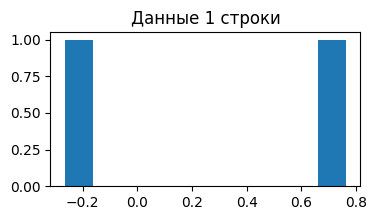

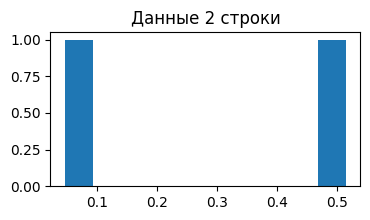

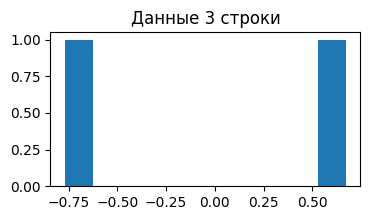

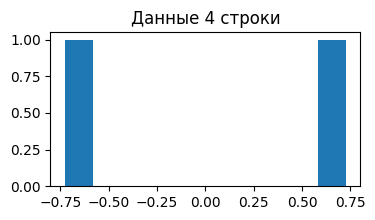

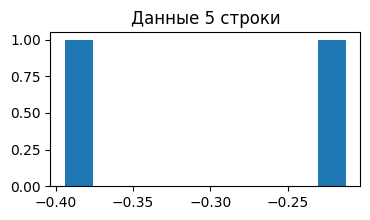

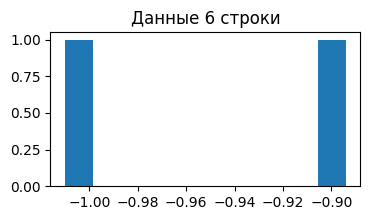

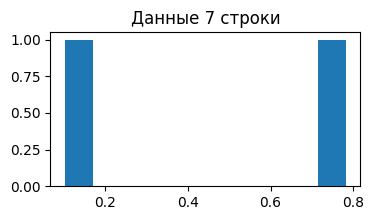

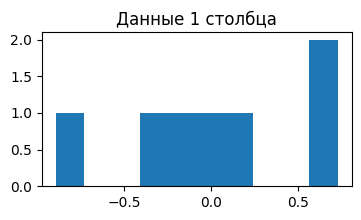

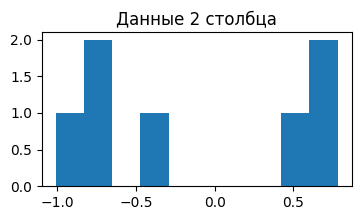

In [5]:
def f(m, n):
    matrix = np.random.normal(0, 1, size=(m, n))
    mean_rows = np.mean(matrix, axis=1)
    mean_columns = np.mean(matrix, axis=0)
    var_rows = np.var(matrix, axis=1)
    var_columns = np.var(matrix, axis=0)

    for i in range(m):
        fig, ax = plt.subplots(figsize=(4, 2))
        ax.set_title(f"Данные {i+1} строки")
        ax.hist(matrix[i, :])
        plt.show()

    for j in range(n):
        fig, ax = plt.subplots(figsize=(4, 2))
        ax.set_title(f"Данные {j+1} столбца")
        ax.hist(matrix[:, j])
        plt.show()

f(7,2)

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [6]:
def chess(m, n, a, b):
    matrix = np.full((m, n), a)
    matrix[::2, 1::2] = b
    matrix[1::2, ::2] = b
    return matrix

print(chess(4, 4, 1, 0))
print()
print(chess(8, 3, 5, -1))

[[1 0 1 0]
 [0 1 0 1]
 [1 0 1 0]
 [0 1 0 1]]

[[ 5 -1  5]
 [-1  5 -1]
 [ 5 -1  5]
 [-1  5 -1]
 [ 5 -1  5]
 [-1  5 -1]
 [ 5 -1  5]
 [-1  5 -1]]


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

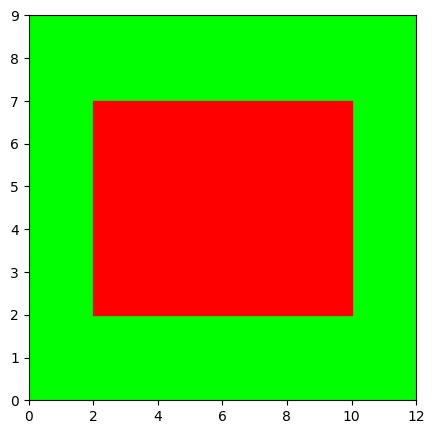

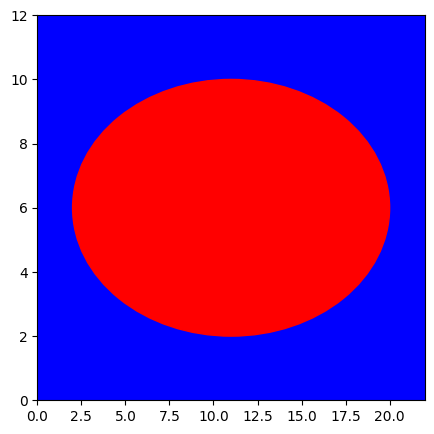

In [13]:
import matplotlib.patches

def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    fig, ax = plt.subplots(figsize=(m, n))
    ax.set_xlim(0, a+4)
    ax.set_ylim(0, b+4)
    rectangle = plt.Rectangle((2, 2), a, b, color=rectangle_color)
    ax.add_patch(rectangle)
    ax.set_facecolor(background_color)
    plt.show()


def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    fig, ax = plt.subplots(figsize=(m,n))
    ax.set_xlim(0, 2*a+4)
    ax.set_ylim(0, 2*b+4)
    ellipse = matplotlib.patches.Ellipse((a+2, b+2), 2*a, 2*b, color=ellipse_color)
    ax.set_facecolor(background_color)
    ax.add_patch(ellipse)

draw_rectangle(8, 5, 5, 5, (1.0, 0.0, 0.0), (0.0, 1.0, 0.0))
draw_ellipse(9, 4, 5, 5, (1.0, 0.0, 0.0), (0.0, 0.0, 1.0))

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [29]:
def make_operations(time_series, p):
    time_series = np.array(time_series)
    mean = np.mean(time_series)
    variance = np.var(time_series)
    standard_deviation = np.std(time_series)
    loc_minimums, loc_maximums = [], []
    for i in range(1, len(time_series) - 1):
        if (time_series[i] < time_series[i-1]
            and time_series[i] < time_series[i+1]):
                loc_minimums.append(int(time_series[i]))
        elif (time_series[i] > time_series[i-1]
            and time_series[i] > time_series[i+1]):
                loc_maximums.append(int(time_series[i]))
    moving_average = []
    left = 0
    for right in range(p-1, len(time_series)):
        moving_average.append(float(f"{(sum(time_series[left:right+1]) / p):.4f}"))
        left += 1

    print(f"Математическое ожидание: {mean}")
    print(f"Дисперсия: {variance}")
    print(f"Среднее квадратическое отклонение: {standard_deviation}")
    print(f"Локальные минимумы: {loc_minimums}")
    print(f"Локальные максимумы: {loc_maximums}")
    print(f"Ряд, полученный методом скользящего среднего: {moving_average}")

make_operations([1,6,4,2,8,9,73,5], 3)

Математическое ожидание: 13.5
Дисперсия: 512.25
Среднее квадратическое отклонение: 22.63294059551255
Локальные минимумы: [2]
Локальные максимумы: [6, 73]
Ряд, полученный методом скользящего среднего: [3.6667, 4.0, 4.6667, 6.3333, 30.0, 29.0]


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [38]:
def one_hot_encoding(vector):
    vector = np.array(vector)
    sorted_counts = np.unique(vector)
    print(f"Уникальные отсортированные значения: {sorted_counts}")
    result = np.zeros((len(vector), len(sorted_counts)))
    num_to_index = {value: column_idx for column_idx, value in enumerate(sorted_counts)}
    print(f"Словарь перевода значений в номер столбца: {num_to_index}")
    for i, num in enumerate(vector):
        result[i, num_to_index[num]] = 1
    return result

print(one_hot_encoding([8, 0, 2, 8, 5, 6, 3, 2])) # 8

Уникальные отсортированные значения: [0 2 3 5 6 8]
Словарь перевода значений в номер столбца: {np.int64(0): 0, np.int64(2): 1, np.int64(3): 2, np.int64(5): 3, np.int64(6): 4, np.int64(8): 5}
[[0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]]
